In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import pickle

In [3]:
dataset = pd.read_csv('Data.csv')
# Selects the Category with the highest value for each row
dataset['Max'] = dataset[['affiliative', 'selfenhancing','agressive', 'selfdefeating']].idxmax(axis=1)

In [5]:
# Cleaning and preprocessing the dataset
encoder = OneHotEncoder()
X = dataset.iloc[:, 0:32]
imputer = SimpleImputer(missing_values=-1, strategy='mean')
Y= encoder.fit_transform(dataset[['Max']])
Y = Y.toarray()

In [4]:
X=X.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_test

array([[2, 5, 3, ..., 4, 4, 4],
       [2, 2, 4, ..., 3, 2, 4],
       [1, 4, 4, ..., 5, 5, 1],
       ...,
       [1, 3, 4, ..., 5, 1, 1],
       [1, 5, 3, ..., 3, 4, 4],
       [1, 4, 3, ..., 3, 1, 5]], dtype=int64)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.0237853 ,  1.52499633, -0.05399147, ...,  0.04785243,
         0.92171733,  0.91989192],
       [-0.0237853 , -1.22900548,  0.80187331, ..., -0.84261886,
        -0.59996066,  0.91989192],
       [-0.94924965,  0.60699573,  0.80187331, ...,  0.93832371,
         1.68255633, -1.50794205],
       ...,
       [-0.94924965, -0.31100488,  0.80187331, ...,  0.93832371,
        -1.36079965, -1.50794205],
       [-0.94924965,  1.52499633, -0.05399147, ..., -0.84261886,
         0.92171733,  0.91989192],
       [-0.94924965,  0.60699573, -0.05399147, ..., -0.84261886,
        -1.36079965,  1.72916991]])

In [6]:
# Building the network
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=50, activation='sigmoid', input_shape=X_train[0].shape))
ann.add(tf.keras.layers.Dense(units=25, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=4, activation="sigmoid"))
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 4)                 104       
                                                                 
Total params: 3,029
Trainable params: 3,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)

Epoch 1/100
27/27 [==============================] - 2s 4ms/step - loss: 0.6060 - accuracy: 0.7664
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.7664
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.7664
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3416 - accuracy: 0.7664
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.7664
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.7664
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.7664
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2741 - accuracy: 0.7664
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.7675
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.7804
Epoch 11/

In [8]:
results = ann.evaluate(X_test, Y_test, batch_size=128)
results

2/2 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9721


[0.051693204790353775, 0.9720930457115173]

In [9]:
Y_pred = ann.predict(X_test)
Y_pred = np.round_(Y_pred)
Y_pred

7/7 [==============================] - 0s 1ms/step


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [10]:
cm = confusion_matrix(Y_pred.argmax(axis=1),Y_test.argmax(axis=1))
cm

array([[167,   1,   1,   3],
       [  0,   5,   0,   0],
       [  0,   0,   5,   0],
       [  2,   0,   0,  31]], dtype=int64)

<AxesSubplot:>

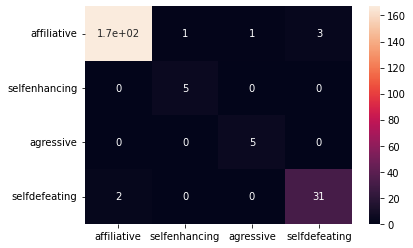

In [11]:

sns.heatmap(cm, annot=True, xticklabels=dataset.iloc[:, -8:-4].columns,
            yticklabels=dataset.iloc[:, -8:-4].columns)

In [12]:
f1 = f1_score(Y_test, Y_pred, average=None)
print(classification_report(Y_test, Y_pred))
f1

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       169
           1       1.00      0.83      0.91         6
           2       1.00      0.83      0.91         6
           3       0.94      0.94      0.94        34

   micro avg       0.98      0.96      0.97       215
   macro avg       0.98      0.90      0.93       215
weighted avg       0.98      0.96      0.97       215
 samples avg       0.96      0.96      0.96       215



c:\Python\Python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.97922849, 0.90909091, 0.90909091, 0.94117647])

In [13]:
pickle.dump(ann, open("model.pkl","wb"))
pickle.dump(sc,open('scalar.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-16 16:16:52         1830
metadata.json                                  2023-01-16 16:16:52           64
variables.h5                                   2023-01-16 16:16:52        58344
